<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F
from sklearn import datasets

A fully-connected 2-layer network with Relu non-linearity.

In [3]:
# class FCNN(nn.Module):
#   def __init__(self, input_dim, hidden_dim, out_dim):
#     super(FCNN, self).__init__()
#     self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
#     self.preactivation_out = nn.Linear(hidden_dim, out_dim)

#   def forward(self, x):
#     """
#     Input:
#           1-d array
#           x is the input of the Neural Net of dimension input_dim
#     Returns:
#           1-d array of dimension out_dim. The score function output.
#     """
#     preactive_1 = self.preactivation_hidden(x)
#     active_1 = F.relu(preactive_1)
#     pre_output = self.preactivation_out(active_1)
#     output = F.relu(pre_output)
#     return output

# # Why is this code wrong? 


In [2]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
    self.activation_hidden = nn.ReLU()
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
    self.activation_out = nn.Softmax()

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = self.activation_hidden(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = self.activation_out(pre_output)
    return output



We use this neural net on Iris dataset.

In [3]:
iris = datasets.load_iris()

In [4]:
my_net = FCNN(4, 10, 3) 

Remember it was necessary to put .float() after your dataset, otherwise an error occured complaining about the dtype double rather than float! It seems a new error!

In [8]:
list(my_net.parameters()) #It contains weights and biases.

[Parameter containing:
 tensor([[-0.0911,  0.4572, -0.0415,  0.1727],
         [-0.0238,  0.4151, -0.2890, -0.1469],
         [ 0.3847, -0.3009, -0.0982,  0.0382],
         [ 0.4942,  0.0273,  0.0497, -0.4950],
         [ 0.1928, -0.4682, -0.0067, -0.1663],
         [ 0.2212,  0.1210, -0.2533, -0.0520],
         [-0.4446, -0.3972,  0.2209, -0.2807],
         [ 0.2569, -0.3577, -0.1595,  0.4449],
         [ 0.2516,  0.3995, -0.0618, -0.4240],
         [-0.0718, -0.1723, -0.1673, -0.2879]], requires_grad=True),
 Parameter containing:
 tensor([-0.0822, -0.2733,  0.1956, -0.0852, -0.2679, -0.3459,  0.1965, -0.3389,
          0.2965, -0.1420], requires_grad=True),
 Parameter containing:
 tensor([[-0.2976,  0.2116,  0.1121,  0.2423, -0.0872, -0.0018,  0.2597, -0.0008,
          -0.0732, -0.0321],
         [-0.2216,  0.1653, -0.2942, -0.1125, -0.2187, -0.1584,  0.0535,  0.0583,
          -0.2356, -0.0413],
         [-0.3141, -0.0880, -0.1398, -0.0788, -0.1136, -0.0781,  0.0053,  0.3041,
     

To be added to this notebook!

1- Add test data and plot test acc and test loss. ***

2- Try with normalized data.

3- Save the results as well as the trained model and do another experiment with the loaded model! *******

4- Do PCA on the data.

5- Try other classifiers than FCNN.

6- Do updates on batches and not the whole dataset at each epoch! ***

In [6]:
#1- We can use the train-test-split function in SKLearn to make train and test splits of the entire dataset.
import sklearn.model_selection as model_selection
train_test_separated = model_selection.train_test_split(iris.data,iris.target, test_size = .1, random_state = 0)
train_data, test_data,train_label,test_label = train_test_separated

In [9]:
#We transform the splitted data arrays to pytorch tensors.
iris_train = torch.from_numpy(train_data)
iris_test = torch.from_numpy(test_data)
iris_train_labels = torch.from_numpy(train_label)
iris_test_labels = torch.from_numpy(test_label)

In [17]:
#Now, we train and test the model.
epochs = range(3000)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr=1e-3)
iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
   optimizer.zero_grad()
   output = my_net.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_train_labels)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_train_labels).float().mean()
   train_acc_list.append(accuracy)
   train_loss_list.append(iris_loss)

   test_output = my_net.forward(iris_test)
   test_preds = torch.argmax(test_output, axis = 1)
   iris_test_loss = loss(test_output, iris_test_labels)
   test_acc = (test_preds == iris_test_labels).float().mean()
   test_acc_list.append(test_acc)
   test_loss_list.append(iris_test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


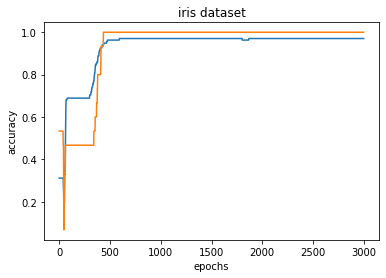

In [18]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.plot(epochs, test_acc_list)

In [12]:
accuracy

tensor(0.3481)